# Assignment 1: k-nearest neighbors

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

In [ ]:
# Load required packages and dataset.
import matplotlib.pyplot as plt
import numpy as np


def load_wine_dataset():
    from sklearn import datasets
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    return X, y
    
X, y = load_wine_dataset()

## Task 1: Visualization and Preprocessing

1) The contents of the dataset. What are the input features? What is the classification target? Link to dataset: [http://archive.ics.uci.edu/ml/datasets/Wine).


* The dataset contains results of chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.
* The dataset contains 178 samples (rows) with 13 different feature attributes (columns) belonging to 3 target classes (y).
* The 13 feature attributes include 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'.
* The target for classification are the 3 classes which represent the 3 different cultivars.

2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [ ]:
#calculating total number of samples
print("Number of samples: %d" % X.shape[0])
#calculating the number of classes present in the data set
print("Classes: %s" % np.unique(y))
#information of number of samples per class
print("Number of samples per class: %s" % np.bincount(y))
#calculation of mean of each input feature in a list
print("Mean for each input feature is : ", np.mean(X, axis=0))
#calculation of standard deviation of each input feature in a list
print("Standard Deviation for each input feature is :",np.std(X, axis=0))

Number of samples: 178
Classes: [0 1 2]
Number of samples per class: [59 71 48]
Mean for each input feature is :  [1.30006180e+01 2.33634831e+00 2.36651685e+00 1.94949438e+01
 9.97415730e+01 2.29511236e+00 2.02926966e+00 3.61853933e-01
 1.59089888e+00 5.05808988e+00 9.57449438e-01 2.61168539e+00
 7.46893258e+02]
Standard Deviation for each input feature is : [8.09542915e-01 1.11400363e+00 2.73572294e-01 3.33016976e+00
 1.42423077e+01 6.24090564e-01 9.96048950e-01 1.24103260e-01
 5.70748849e-01 2.31176466e+00 2.27928607e-01 7.07993265e-01
 3.14021657e+02]


3) Visualize the variables *alcohol* and *magnesium* in a scatter plot (*alcohol* on the x-axis, *magnesium* on the y-axis). Color each point of the plot according to its class.

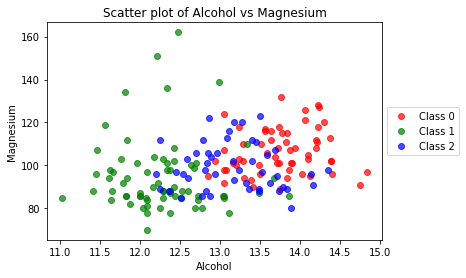

In [ ]:
alc0 = [X[x][0] for x in range(0,178) if y[x]==0]
mag0 = [X[x][4] for x in range(0,178) if y[x]==0]
alc1 = [X[x][0] for x in range(0,178) if y[x]==1]
mag1 = [X[x][4] for x in range(0,178) if y[x]==1]
alc2 = [X[x][0] for x in range(0,178) if y[x]==2]
mag2 = [X[x][4] for x in range(0,178) if y[x]==2]
scatter = plt.scatter(alc0, mag0, c='red', label='Class 0', alpha=0.7)
scatter = plt.scatter(alc1, mag1, c='green', label='Class 1', alpha=0.7)
scatter = plt.scatter(alc2, mag2, c='blue', label='Class 2', alpha=0.7)
plt.title('Scatter plot of Alcohol vs Magnesium')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement 
the function `train_test_split`. Do not modify the interface of the function.

In [ ]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    len = X.shape[0]
    # create indices to be randomised
    a = np.arange(len)
    # randomise the indices for train-test split
    np.random.shuffle(a)

    train_len = (int)(0.7 * len)
    # assign 70% of randomly split data to X_train and y_train
    X_train = X[a[:train_len], :]
    y_train = y[a[:train_len]]
    # assign the remaining 30% of data to X_test and y_test
    X_test = X[a[train_len:], :]
    y_test = y[a[train_len:]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [ ]:
X_min = X_train.min(axis=0)
X_max = X_train.max(axis=0)
#min-max scaling procedure
X_train = np.divide((X_train - X_min), (X_max - X_min))
X_test = np.divide((X_test - X_min), (X_max - X_min))

## Task 2: k-nearest neighbors
*Choose classes randomly if weights are equal for multiple classes*

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [ ]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        final_x = []

        if self.weights == 'uniform':
            # uniform weighted k-NN classifier
            for x in X:
                ed_ls = []      # list of euclidean distances
                for index, xx in enumerate(self.X):
                    ed = euclidean_distance(x, xx)
                    ed_ls.append((self.y[index], ed))
                ed_ls.sort(key=lambda tup: tup[1])
                ked_ls = ed_ls[:self.k]     # list of first k nearest neighbors

                # list to store first k class of samples
                k_y = [a[0] for a in ked_ls]
                
                # find majority of classes in first k nearest neighbors
                final_x.append(np.bincount(k_y).argmax()) 
        elif self.weights == 'distance':
            # inverse distance weighted k-NN classifier 
            for x in X:
                ed_ls = []      # list of euclidean distances
                for index, xx in enumerate(self.X):
                    ed = euclidean_distance(x, xx)
                    ed_ls.append((self.y[index], ed))
                ed_ls.sort(key=lambda tup: tup[1])
                ked_ls = ed_ls[:self.k]     # list of first k nearest neighbors

                # calculation of weighted distance by taking inverse of
                # the euclidean distance of first k neighbors
                wd = [[1.0/item[1], item[0]] if item[1] != 0 else [1.0, item[0]] for item in ked_ls] 
                y_un = np.unique(self.y)
                c = np.zeros(y_un.size)
                # calculating the sum of weighted distance belonging to each class
                for x1 in y_un:
                    for w in wd:
                        if w[1] == x1:
                            c[x1] += w[0]
                # find class with maximum weighted sum of inverse distances 
                # among first k nearest neighbors
                final_x.append(np.argmax(c))
        
        return np.array(final_x)
        

def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

## Task 3: Evaluation

1) Implement functions to compute precision, recall and F1-score. `y_pred` and `y_true` are the vectors of predicted and true class labels respectively with shape `(n,)`, where `n` is the number of samples. Each function should return a float containing the corresponding score. It is advisable to implement a function for the confusion matrix and reuse it.

In [ ]:
def precision(y_pred, y_true):
    y_unique = np.unique(y_true)
    precision_list = []
    for c in y_unique:
        tp = 0
        fp = 0
        for index, y_p in enumerate(y_pred):
            if y_p == c:
                if y_p == y_true[index]:
                    tp = tp + 1
                else:
                    fp = fp + 1
        # precision calculation formula (true positive/(true positive + false positive))            
        precision_list.append(tp*1.0/(tp + fp))
    return np.mean(precision_list)


def recall(y_pred, y_true):
    y_unique = np.unique(y_true)
    recall_list = []
    for c in y_unique:
        tp = 0
        fn = 0
        for index, y_p in enumerate(y_pred):
            if y_true[index] == c:
                if y_p == y_true[index]:
                    tp = tp + 1
                else:
                    fn = fn + 1
        # recall calculation formula (true positive/(true positive + false negative))              
        recall_list.append(tp*1.0/(tp + fn))
    return np.mean(recall_list)


def f1score(y_pred, y_true):
    pre = precision(y_pred, y_true)
    re = recall(y_pred, y_true)
    # calculating F1 score (F1 = 2/((1/precision)+(1/recall)))
    return 2 * pre * re / (pre + re)

2) Evaluate the performance of kNN with uniform weighting on the Wine dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

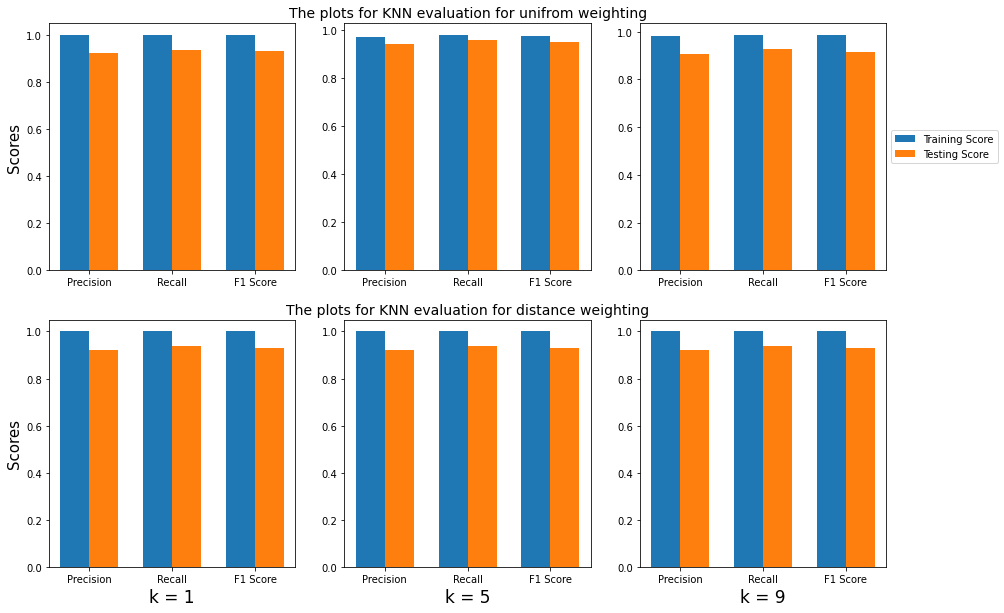

In [ ]:
labels = ['Precision', 'Recall', 'F1 Score']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# k=1, weights='uniform'
kNN1 = KNearestNeighbors(k=1, weights='uniform')
kNN1.fit(X_train, y_train)

yt1_pred = kNN1.predict(X_train)
y1_pred = kNN1.predict(X_test)

prec1_trn = precision(yt1_pred, y_train)
rec1_trn = recall(yt1_pred, y_train)
f1sc1_trn = f1score(yt1_pred, y_train)

prec1_tst = precision(y1_pred, y_test)
rec1_tst = recall(y1_pred, y_test)
f1sc1_tst = f1score(y1_pred, y_test)

bar1 = [prec1_trn, rec1_trn, f1sc1_trn]
bar2 = [prec1_tst, rec1_tst, f1sc1_tst]

rects1 = ax[0, 0].bar(x - width/2, bar1, width, label='Training Score')
rects2 = ax[0, 0].bar(x + width/2, bar2, width, label='Testing Score')

# ax[0, 0].set_xlabel('k = 1', size=15)
ax[0, 0].set_ylabel('Scores', size=15)
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(labels)

# k=5, weights='uniform'
kNN5 = KNearestNeighbors(k=5, weights='uniform')
kNN5.fit(X_train, y_train)

yt5_pred = kNN5.predict(X_train)
y5_pred = kNN5.predict(X_test)

prec5_trn = precision(yt5_pred, y_train)
rec5_trn = recall(yt5_pred, y_train)
f1sc5_trn = f1score(yt5_pred, y_train)

prec5_tst = precision(y5_pred, y_test)
rec5_tst = recall(y5_pred, y_test)
f1sc5_tst = f1score(y5_pred, y_test)

bar3 = [prec5_trn, rec5_trn, f1sc5_trn]
bar4 = [prec5_tst, rec5_tst, f1sc5_tst]

rects3 = ax[0, 1].bar(x - width/2, bar3, width, label='Training Score')
rects4 = ax[0, 1].bar(x + width/2, bar4, width, label='Testing Score')

# ax[0, 1].set_xlabel('k = 5', size=15)
ax[0, 1].set_title("The plots for KNN evaluation for unifrom weighting", size=14)
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(labels)

# k=9, weights='uniform'
kNN9 = KNearestNeighbors(k=9, weights='uniform')
kNN9.fit(X_train, y_train)

yt9_pred = kNN9.predict(X_train)
y9_pred = kNN9.predict(X_test)

prec9_trn = precision(yt9_pred, y_train)
rec9_trn = recall(yt9_pred, y_train)
f1sc9_trn = f1score(yt9_pred, y_train)

prec9_tst = precision(y9_pred, y_test)
rec9_tst = recall(y9_pred, y_test)
f1sc9_tst = f1score(y9_pred, y_test)

bar5 = [prec9_trn, rec9_trn, f1sc9_trn]
bar6 = [prec9_tst, rec9_tst, f1sc9_tst]

rects5 = ax[0, 2].bar(x - width/2, bar5, width, label='Training Score')
rects6 = ax[0, 2].bar(x + width/2, bar6, width, label='Testing Score')

# ax[0, 2].set_xlabel('k = 9', size=15)
ax[0, 2].set_xticks(x)
ax[0, 2].set_xticklabels(labels)
ax[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# k=1, weights='distance'
kNN1w = KNearestNeighbors(k=1, weights='distance')
kNN1w.fit(X_train, y_train)

yt1w_pred = kNN1w.predict(X_train)
y1w_pred = kNN1w.predict(X_test)

prec1w_trn = precision(yt1w_pred, y_train)
rec1w_trn = recall(yt1w_pred, y_train)
f1sc1w_trn = f1score(yt1w_pred, y_train)

prec1w_tst = precision(y1w_pred, y_test)
rec1w_tst = recall(y1w_pred, y_test)
f1sc1w_tst = f1score(y1w_pred, y_test)

bar1w = [prec1w_trn, rec1w_trn, f1sc1w_trn]
bar2w = [prec1w_tst, rec1w_tst, f1sc1w_tst]

rects1w = ax[1, 0].bar(x - width/2, bar1w, width, label='Training Score')
rects2w = ax[1, 0].bar(x + width/2, bar2w, width, label='Testing Score')

ax[1, 0].set_xlabel('k = 1', size=17)
ax[1, 0].set_ylabel('Scores', size=15)
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(labels)

# k=5, weights='distance'
kNN5w = KNearestNeighbors(k=1, weights='distance')
kNN5w.fit(X_train, y_train)

yt5w_pred = kNN5w.predict(X_train)
y5w_pred = kNN5w.predict(X_test)

prec5w_trn = precision(yt5w_pred, y_train)
rec5w_trn = recall(yt5w_pred, y_train)
f1sc5w_trn = f1score(yt5w_pred, y_train)

prec5w_tst = precision(y5w_pred, y_test)
rec5w_tst = recall(y5w_pred, y_test)
f1sc5w_tst = f1score(y5w_pred, y_test)

bar5w = [prec5w_trn, rec5w_trn, f1sc5w_trn]
bar2w = [prec5w_tst, rec5w_tst, f1sc5w_tst]

rects5w = ax[1, 1].bar(x - width/2, bar5w, width, label='Training Score')
rects2w = ax[1, 1].bar(x + width/2, bar2w, width, label='Testing Score')

ax[1, 1].set_xlabel('k = 5', size=17)
ax[1, 1].set_title("The plots for KNN evaluation for distance weighting", size=14)
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(labels)

# k=9, weights='distance'
kNN9w = KNearestNeighbors(k=1, weights='distance')
kNN9w.fit(X_train, y_train)

yt9w_pred = kNN9w.predict(X_train)
y9w_pred = kNN9w.predict(X_test)

prec9w_trn = precision(yt9w_pred, y_train)
rec9w_trn = recall(yt9w_pred, y_train)
f1sc9w_trn = f1score(yt9w_pred, y_train)

prec9w_tst = precision(y9w_pred, y_test)
rec9w_tst = recall(y9w_pred, y_test)
f1sc9w_tst = f1score(y9w_pred, y_test)

bar9w = [prec9w_trn, rec9w_trn, f1sc9w_trn]
bar2w = [prec9w_tst, rec9w_tst, f1sc9w_tst]

rects9w = ax[1, 2].bar(x - width/2, bar9w, width, label='Training Score')
rects2w = ax[1, 2].bar(x + width/2, bar2w, width, label='Testing Score')

ax[1, 2].set_xlabel('k = 9', size=17)
ax[1, 2].set_xticks(x)
ax[1, 2].set_xticklabels(labels)

plt.show()

==> Observations : 
Testing and training error goes up as the value of k goes up,similarly the F1, recall and precision scores reduces as k increases. There is no "model" built, hence there is nothing to validate.  

3) Explain why kNN with `k=1` achieves perfect results on the training data. Why is it not the best model?

==> *The error rate at k=1 is always zero for the training data, because the closest point of any training data point is itself. (training data = predicted point). It is not the best model because we are overfitting the boundaries. Hence, validation error of the model intitally decreases and reaches the minima and then increases with increase with value of k.*